In [13]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

from src.author_mapping.scripts.map_abbreviations_to_authors import map_abbreviations_to_authors

In [19]:
authors, authors_frequency_score, authors_department_score, author_mapping, self_referencing_authors, remaining_abbrs = map_abbreviations_to_authors("../data/interim/articles_with_author_mapping.db")

100%|██████████| 275/275 [00:07<00:00, 34.86it/s]

Found 275 authors with both frequency and department score
Removed 3 self referencing nodes
constructed graph with 526 nodes and 454 edges
calculated new assigned graph with 391 nodes and 182 edges
author_mapping has 182 rows
after dummy removal: author_mapping has 135 rows
There are 27 abbreviations that were not matched
['ast', 'at', 'nie', 'mape', 'ttr', 'mot', 'mabe', 'beck', 'ms', 'thomas', 'th', 'haeg', 'ter vehn', 'döring', 'isc', 'grätz', 'sag', 'nag', 'roger', 'kreuz', 'dei', 'sie', 'iro', 'psz', 'cc', 'hem', 'almu']
21 abbreviations have only one edge in the old graph
remaining unmatched abbreviations ['ttr', 'mabe', 'beck', 'ms', 'haeg', 'nag']


In [3]:
# TODO: remove this, this is only for testing the correlation of very certain matchings
# set authors to top authors based on score
# top_authors = authors.sort_values(by=["normalized_score"], ascending=[True] ).head(30)
# authors = top_authors

In [20]:
# Calculate the correlation between the different scores
department_frequency_coef, department_frequency_p = pearsonr(authors["department_score_normalized"], authors["frequency_score_normalized"])
print(f"pearson correlation coefficient for department and frequency {department_frequency_coef} with p {department_frequency_p}")

department_certainty_coef, department_certainty_p = pearsonr(authors["department_score_normalized"], authors["certainty"])
print(f"pearson correlation coefficient for department and certainty {department_certainty_coef} with p {department_certainty_p}")

frequency_certainty_coef, frequency_certainty_p = pearsonr(authors["frequency_score_normalized"], authors["certainty"])
print(f"pearson correlation coefficient for frequency and certainty {frequency_certainty_coef} with p {frequency_certainty_p}")

pearson correlation coefficient for department and frequency 0.16249294029648523 with p 0.007243635990898906
pearson correlation coefficient for department and certainty 0.07782859044799759 with p 0.20068147078956755
pearson correlation coefficient for frequency and certainty 0.23519164793085667 with p 8.999713012031654e-05


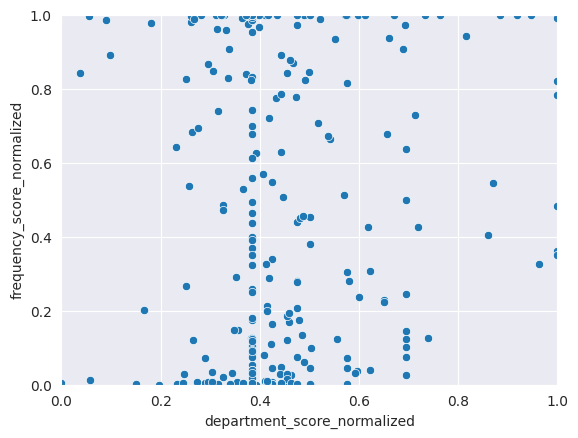

<Figure size 640x480 with 0 Axes>

In [24]:
fig, ax = plt.subplots()
sns.scatterplot(data=authors, x="department_score_normalized", y="frequency_score_normalized", ax=ax)
# set axes ranges to 0,1
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()
plt.clf()

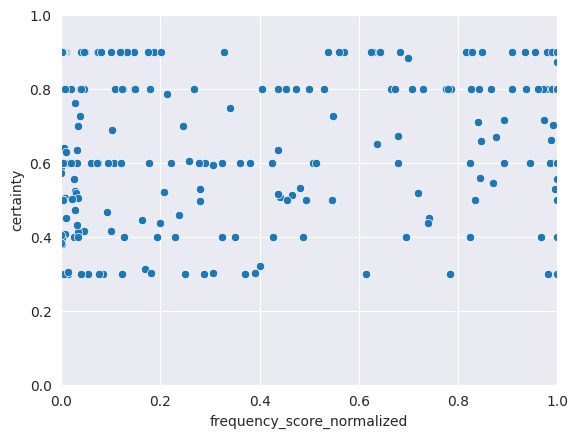

<Figure size 640x480 with 0 Axes>

In [25]:
fig, ax = plt.subplots()
sns.scatterplot(data=authors, x="frequency_score_normalized", y="certainty", ax=ax)
# set axes ranges to 0,1
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()
plt.clf()

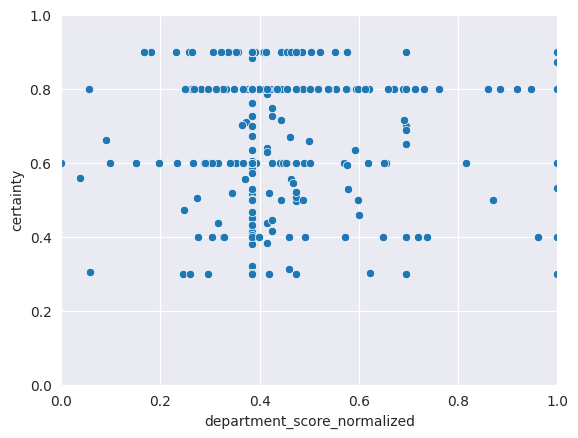

<Figure size 640x480 with 0 Axes>

In [26]:
fig, ax = plt.subplots()
sns.scatterplot(data=authors, x="department_score_normalized", y="certainty", ax=ax)
# set axes ranges to 0,1
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()
plt.clf()